## Introduction

I'm a big basketball fan. Lucky for me, basketball has recently under gone a statistical explosion into the "analytics era". New, novel, advanced stats are collected by even the most common websites such as Basketball Reference and NBA's own stats site.

That being said, the methods for accessing the data may not be the easiest or most straightforward. The data I needed to create this was sourced in this way:
https://www.reddit.com/r/sportsbook/comments/59hsno/best_website_to_pull_nba_statistics_into_excel/.

With the data sourced, this brief analysis focused on probably the greatest shooter of all time, Steph Curry. His shot is nothing short of impeccable and shoots at mind-boggling rates he has changed the current game of basketball. With that in mind, I wanted to find out who defends him the most, who does the best job, and who does Steph roast from beyond the arc.

As always, first we load the necessary libraries. There will be warnings and such due to tidyverse's masking of other functions:

In [1]:
library(readr)
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v ggplot2 3.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Now we import the data into the environment:

In [3]:
#raw csv import
source <- read_csv("C:/Users/NTellaku/Documents/R/Steph Curry Infographic/leagueseasonmatchups.csv")

#data labels
labels <- source %>% 
  select(resultSets__headers) %>% 
  slice(1:34)

#data values
source_info <- source %>% 
    select(resultSets__rowSet)
head(source)

Parsed with column specification:
cols(
  resource = col_character(),
  parameters__LeagueID = col_character(),
  parameters__Season = col_character(),
  parameters__SeasonType = col_character(),
  parameters__PORound = col_double(),
  parameters__PerMode = col_character(),
  parameters__Outcome = col_character(),
  parameters__DateFrom = col_character(),
  parameters__DateTo = col_character(),
  parameters__DefTeamID = col_character(),
  parameters__OffTeamID = col_character(),
  parameters__OffPlayerID = col_double(),
  parameters__DefPlayerID = col_character(),
  resultSets__name = col_character(),
  resultSets__headers = col_character(),
  resultSets__rowSet = col_character()
)


resource,parameters__LeagueID,parameters__Season,parameters__SeasonType,parameters__PORound,parameters__PerMode,parameters__Outcome,parameters__DateFrom,parameters__DateTo,parameters__DefTeamID,parameters__OffTeamID,parameters__OffPlayerID,parameters__DefPlayerID,resultSets__name,resultSets__headers,resultSets__rowSet
leagueseasonmatchups,00,2018-19,Regular Season,0,Totals,null,null,null,null,null,201939,null,SeasonMatchups,OFF_TEAM_ID,1610612744
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,OFF_TEAM_ABBREVIATION,GSW
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,OFF_TEAM_CITY,Golden State
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,OFF_TEAM_NICKNAME,Warriors
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,OFF_PLAYER_ID,201939
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,OFF_PLAYER_NAME,Stephen Curry


The resulting output doesn't look to make too much sense. The way the JSON converts the data into a .csv is the reason why. A deeper look shows that most of the data is empty and every piece of info that's needed is within the last two columns: <code>resultSets__headers</code> and <code>resultSets__rowSet</code>. <code>labels</code> contains the column <code>resultSets__headers</code> which looks to be all the row names. <code>source_info</code> contains the column <code>resultSets__rowSet</code> which seems to contain the actual usable data.

As this is a one-column csv from a JSON, we now have to actually wrangle the data set:

In [10]:
#initializing empty matrix
source_split <- as_tibble(matrix(, nrow = 34, ncol = 350))

We create an empty matrix. Now we need to take all the information in <code>resultSets__headers</code> and <code>resultSets__rowSet</code> and put it into the matrix so we have a usable Data Frame:

In [11]:
#loop to go through the rows and add each data point to the matrix
i <- 1
value <- i + 33
j <- 1
while (value <= 11900) {
  source_split[, j] <- source_info %>% 
    slice(i:value)
  i <- i + 34
  value <- i + 33
  j <- j + 1
}

#transposing and converting the matrix into a tidyverse data frame
analysis <- as_tibble(t(source_split))
colnames(analysis) <- t(labels)
head(analysis)

OFF_TEAM_ID,OFF_TEAM_ABBREVIATION,OFF_TEAM_CITY,OFF_TEAM_NICKNAME,OFF_PLAYER_ID,OFF_PLAYER_NAME,DEF_TEAM_ID,DEF_TEAM_ABBREVIATION,DEF_TEAM_CITY,DEF_TEAM_NICKNAME,...,FGA,FGA_DIFF,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,SFL,DEF_FOULS,OFF_FOULS
1610612744,GSW,Golden State,Warriors,201939,Stephen Curry,1610612750,MIN,Minnesota,Timberwolves,...,30,0.7594971965098634294385432473,0.567000,11,18,0.611000,2,0,0,0
1610612744,GSW,Golden State,Warriors,201939,Stephen Curry,1610612758,SAC,Sacramento,Kings,...,34,0.9513727579666160849772382398,0.529000,10,21,0.476000,5,1,0,0
1610612744,GSW,Golden State,Warriors,201939,Stephen Curry,1610612762,UTA,Utah,Jazz,...,30,0.8791040212443095599393019727,0.433000,5,16,0.313000,3,2,0,3
1610612744,GSW,Golden State,Warriors,201939,Stephen Curry,1610612743,DEN,Denver,Nuggets,...,21,0.7169933990895295902883156297,0.524000,10,18,0.556000,4,1,2,1
1610612744,GSW,Golden State,Warriors,201939,Stephen Curry,1610612747,LAL,Los Angeles,Lakers,...,17,0.6142340212443095599393019727,0.412000,5,11,0.455000,0,0,0,0
1610612744,GSW,Golden State,Warriors,201939,Stephen Curry,1610612757,POR,Portland,Trail Blazers,...,26,0.9975273937784522003034901366,0.462000,6,14,0.429000,8,3,0,2


From the JSON, we were able to extract a Tibble listing Steph Curry's performance against the other teams he played against and various statistics such as fouls, 3-point percentage, etc. With this, we want to make our analytical data set that contains the information we need and new variables we may need to create.

In [12]:
analysis2 <- analysis %>% 
  mutate(name_poss = paste(analysis$DEF_PLAYER_NAME, " (", analysis$POSS, ")",
                           sep = "")) %>% 
  slice(1:26) %>% 
  select(name_poss, POSS, FG3M, FG3A, FG3_PCT) %>% 
  transform(POSS = as.numeric(POSS), FG3M = as.numeric(FG3M),
            FG3A = as.numeric(FG3A), FG3_PCT = as.numeric(FG3_PCT))
#Analysis dataset complete

head(analysis2)

name_poss,POSS,FG3M,FG3A,FG3_PCT
Tyus Jones (147),147,11,18,0.611
De'Aaron Fox (133),133,10,21,0.476
Ricky Rubio (127),127,5,16,0.313
Jamal Murray (109),109,10,18,0.556
Kentavious Caldwell-Pope (103),103,5,11,0.455
Damian Lillard (97),97,6,14,0.429


We now have what we need. The players who defended Steph Curry, the number of possessions, the number of threes he made and attempted, and the corresponding percentage. The <code>slice</code> function can be less manual, but the intention was to have players who guarded Steph a minimum of 40 total possessions through the season. I'll leave <code>slice</code> for now, but the ultimate goal of the code can be better replaced with <code>filter(POSS >= 40)</code>.

With the analytical data set complete, we create the visual to check out Steph's performance against his primary defenders:

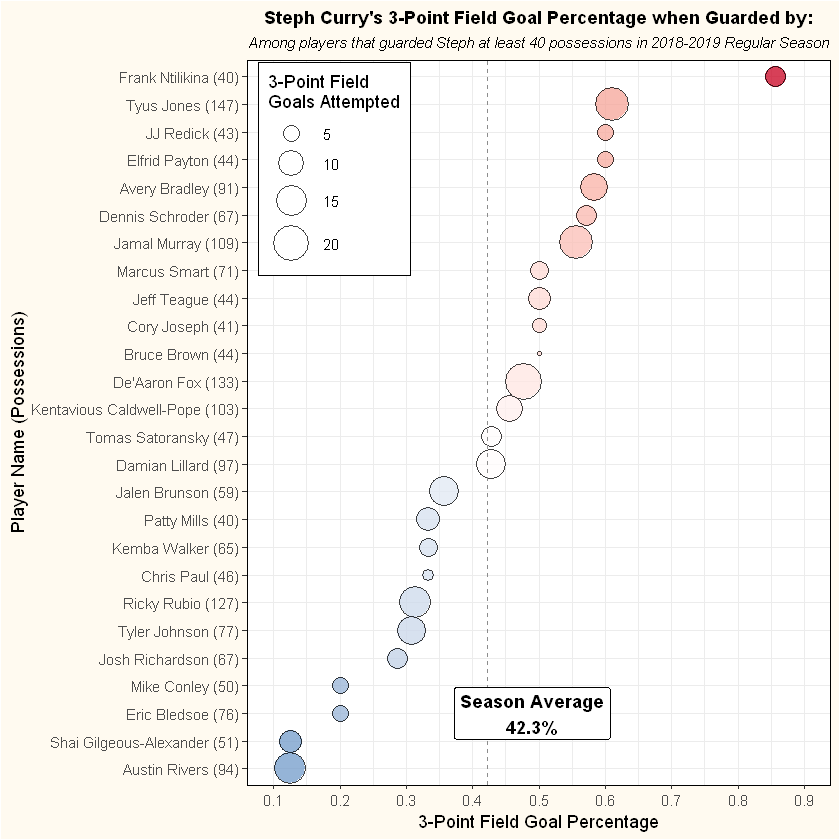

In [13]:
analysis2 %>%
  ggplot(aes(x = reorder(name_poss, +FG3_PCT),
             y = FG3_PCT,
             size = FG3A,
             fill = FG3_PCT)) +
  geom_point(alpha = 0.75,
             shape = 21,
             color = "black") +
  coord_flip() +
  labs(size = "3-Point Field\nGoals Attempted",
       title = "Steph Curry's 3-Point Field Goal Percentage when Guarded by:",
       subtitle = "Among players that guarded Steph at least 40 possessions in 2018-2019 Regular Season",
       y = "3-Point Field Goal Percentage",
       x = "Player Name (Possessions)") +
  scale_y_continuous(limits = c(0.1, 0.9),
                     breaks = seq(0.1, 0.9, 0.1)) +
  scale_size_continuous(range = c(1, 10)) +
  theme(legend.position = c(0.15, 0.85),
        panel.border = element_rect(colour = "black", fill = NA),
        plot.background = element_rect(fill = "floralwhite"),
        panel.background = element_rect(fill = "white"),
        panel.grid.major = element_line(size = 0.5, linetype = "solid",
                                        colour = "#ececec"),
        panel.grid.minor = element_line(size = 0.5, linetype = "solid",
                                        colour = "#ececec"),
        legend.key = element_rect(colour = "transparent", fill = "transparent"),
        legend.background = element_blank(),
        legend.box.background = element_rect(colour = "black"),
        plot.title = element_text(face = "bold", size = 11, hjust = 0.5),
        plot.subtitle = element_text(face = "italic", size = 9, hjust = 0.5)) +
  geom_hline(yintercept = 0.423, linetype = 2, color = "gray55") +
  annotate(geom = "label",
           x = 3, y = .49,
           label = "Season Average\n42.3%",
           fontface = "bold") +
  scale_fill_gradient2(low = ("#0571b0"),
                       mid = "white",
                       high = ("#ca0020"),
                       midpoint = 0.423,
                       guide = FALSE)

Poor Frank and Tyus Jones seem to get cooked the most, whereas Austin Rivers does a surprisngly good job defending Steph from the 3-point line.